In [1]:
import sys
sys.path.append('CLIP-dissect') 


In [2]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import cv2
import glob
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import matplotlib
import similarity
import utils
import data_utils
%matplotlib inline

c:\Users\kier0\anaconda3\envs\facemodel\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from neuron_accuracy import get_actual_labels, neuron_accuracy
from clip_dissect_pipeline import dissect_pipeline

In [4]:
dataset_path = "FER2013"
class_names = os.listdir(dataset_path+"/train")
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
emotions = []
for file_name in glob.glob(dataset_path+'/train/*/*'):
    emotion = file_name.split('/')[-2]
    if emotion not in emotions:
        img = cv2.imread(file_name)
    emotions.append(emotion)
    
emotions = []
for file_name in glob.glob(dataset_path+'/test/*/*'):
    emotion = file_name.split('/')[-2]
    if emotion not in emotions:
        img = cv2.imread(file_name)
    emotions.append(emotion)

In [6]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((48,48))])

train_dataset = ImageFolder(dataset_path+'/train',transform)
train_loader = DataLoader(dataset=train_dataset,batch_size=100*6)
#creating val data loaders
val_dataset = ImageFolder(dataset_path+'/test',transform)
val_loader = DataLoader(dataset=val_dataset,batch_size=100)

In [7]:
d_probe = 'FER2013'
concept_set = 'CLIP-dissect/data/emotions.txt' # concept set needs to be path to .txt file
similarity_fn = similarity.soft_wpmi

In [8]:
train_dataset[0][0].shape

torch.Size([3, 48, 48])

100%|██████████| 7/7 [00:00<00:00, 3499.84it/s]


torch.Size([7, 7])


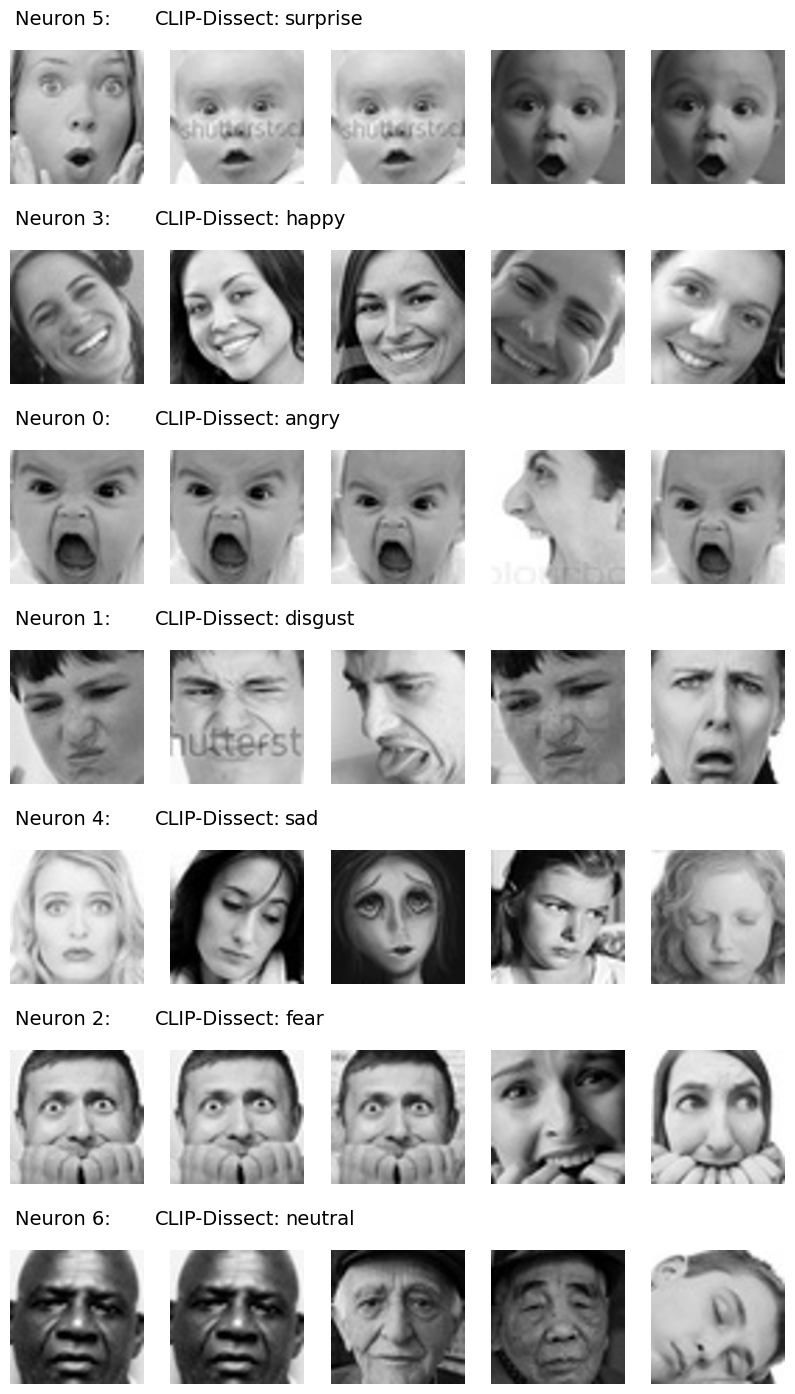

(['surprise', 'happy', 'angry', 'disgust', 'sad', 'fear', 'neutral'],
 {tensor(5, device='cuda:0'): [26468, 27625, 28541, 26094, 28404],
  tensor(3, device='cuda:0'): [13448, 12824, 9265, 14738, 12857],
  tensor(0, device='cuda:0'): [1726, 2323, 1225, 3421, 590],
  tensor(1, device='cuda:0'): [4213, 4128, 4240, 4179, 4193],
  tensor(4, device='cuda:0'): [21913, 24169, 22652, 24108, 24179],
  tensor(2, device='cuda:0'): [5602, 4682, 6878, 8426, 6739],
  tensor(6, device='cuda:0'): [18778, 18345, 19811, 19044, 17904]})

In [9]:
dissect_pipeline(d_probe,concept_set, similarity_fn, 'deep_emotion', 'lin3')

In [10]:
concept_set = 'CLIP-dissect/data/concept_set.txt' # concept set needs to be path to .txt file

100%|██████████| 64/64 [00:00<00:00, 9143.21it/s]


torch.Size([64, 27])


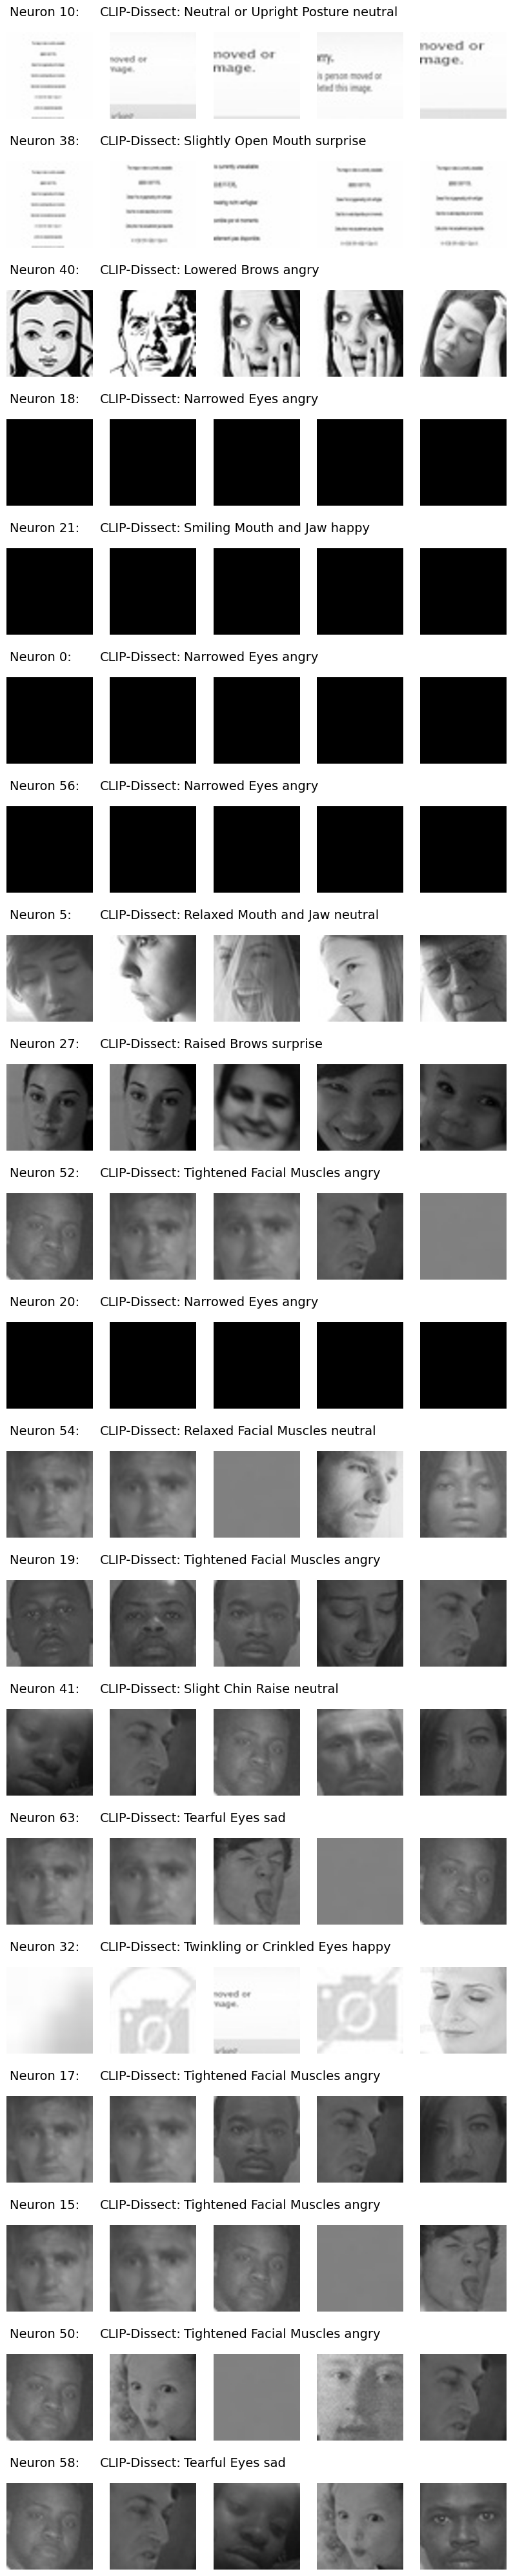

In [30]:
predicted_emotions, neuron_image_indices = dissect_pipeline(d_probe, concept_set, similarity_fn, 'deep_emotion', 'conv1b')

In [31]:
pil_data = data_utils.get_data(d_probe)

In [32]:
neuron_accuracy(neuron_image_indices, predicted_emotions, pil_data, concept_set = "concept_set")

Neuron 10: Predicted Emotion = neutral, Accuracy = 0.2
    Image Index 28594: Actual Label = surprise
    Image Index 8865: Actual Label = happy
    Image Index 27192: Actual Label = surprise
    Image Index 17645: Actual Label = neutral
    Image Index 28233: Actual Label = surprise
Neuron 38: Predicted Emotion = surprise, Accuracy = 0.6
    Image Index 28594: Actual Label = surprise
    Image Index 25553: Actual Label = surprise
    Image Index 10207: Actual Label = happy
    Image Index 7376: Actual Label = fear
    Image Index 26571: Actual Label = surprise
Neuron 40: Predicted Emotion = angry, Accuracy = 0.2
    Image Index 23583: Actual Label = sad
    Image Index 2938: Actual Label = angry
    Image Index 7200: Actual Label = fear
    Image Index 6152: Actual Label = fear
    Image Index 17840: Actual Label = neutral
Neuron 18: Predicted Emotion = angry, Accuracy = 1.0
    Image Index 838: Actual Label = angry
    Image Index 1002: Actual Label = angry
    Image Index 1882: Actu